In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt        #show, computation and manipulation
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential    #to analyse the sequence of data
from keras.layers import Dense,LSTM,Dropout   #importing the lstm and dropout rate

In [3]:
data = pd.read_csv('traindata.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    791 non-null    object 
 1   00:00   791 non-null    float64
 2   02:00   791 non-null    float64
 3   04:00   791 non-null    float64
 4   06:00   791 non-null    float64
 5   08:00   791 non-null    float64
 6   10:00   791 non-null    float64
 7   12:00   791 non-null    float64
 8   14:00   791 non-null    float64
 9   16:00   791 non-null    float64
 10  18:00   791 non-null    float64
 11  20:00   791 non-null    float64
 12  22:00   791 non-null    float64
dtypes: float64(12), object(1)
memory usage: 101.3+ KB


In [5]:
data.head()

,Date,00:00,02:00,04:00,06:00,08:00,10:00,12:00,14:00,16:00,18:00,20:00,22:00
0,01-01-2018,325.0,332.0,324.0,356.0,456.0,490.0,689.0,728.0,555.0,622.0,428.0,339.0
1,01-02-2018,302.0,300.0,282.0,396.0,510.0,590.0,600.0,656.0,612.0,414.0,410.0,324.0
2,01-03-2018,253.0,310.0,210.0,355.0,510.0,595.0,595.0,710.0,612.0,500.0,395.0,310.0
3,01-04-2018,295.0,301.0,222.0,348.0,566.0,601.0,500.0,702.0,653.0,421.0,385.0,210.0
4,01-05-2018,235.0,298.0,208.0,395.0,594.0,610.0,695.0,636.0,456.0,305.0,476.0,222.0


In [6]:
# preprocessing for having numeric data and removing null values
data = data.dropna()
trainData = data.iloc[:,1:13].values

In [7]:
#rescaling into 0 and 1

sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(791, 12)

In [8]:
#preparing data train
#X time steps 60 and length of our data is 420
#creating an input sequence of 60 time steps of X train data along side respective y train labels
X_train= []
Y_train= []

for i in range (60,420):
    X_train.append(trainData[i-60:i,:])
    Y_train.append(trainData[i,0])       #adding another axis for the batch size since the input for LSTM network is a 3d tensor
                                         # that is sequence length, time steps, batch size
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2]))    #adding the batch size axis
X_train.shape

(360, 60, 12)

In [10]:
#LSTM network containg 6 layers followed by dropout layer and dense layer.

model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer = 'adam', loss = "mean_squared_error", metrics=['mean_squared_error'])

#compile them with optimizer and loss

In [11]:
#train the data now using 20 epochs and with a batch size of 32. For total 20 iterations it will work.
hist = model.fit(X_train, Y_train, epochs = 20, batch_size= 32, verbose=2)

Epoch 1/20
12/12 - 26s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 2/20
12/12 - 3s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 3/20
12/12 - 4s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 4/20
12/12 - 4s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 5/20
12/12 - 3s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 6/20
12/12 - 4s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 7/20
12/12 - 2s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 8/20
12/12 - 2s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 9/20
12/12 - 3s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 10/20
12/12 - 3s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 11/20
12/12 - 3s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 12/20
12/12 - 3s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 13/20
12/12 - 2s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 14/20
12/12 - 2s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 15/20
12/12 - 3s - loss: 0.0313 - mean_squared_error: 0.0313
Epo

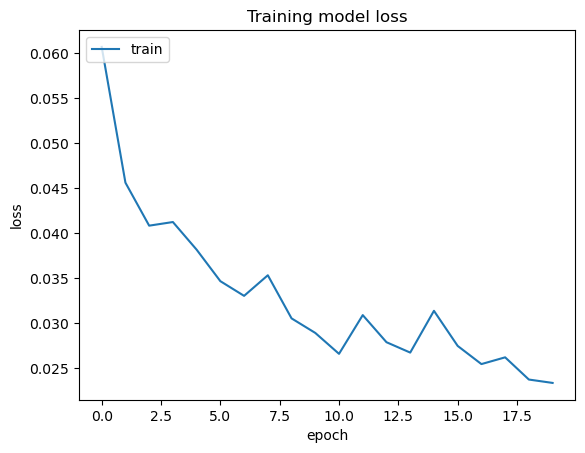

In [12]:
#visualize the loss during each epoch training process

plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
# Test this model with new dataset which is testdata.

In [47]:
testData = pd.read_csv('testData.csv')
testData.dropna()
testData = testData.iloc[:, 1:13]
Y_test = testData.iloc[60:,0:].values

#input array for the model

inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

X_test = []
length = len(testData)
timestep = 60

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, :])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], X_test.shape[2])) 
X_test.shape

(936, 60, 12)

In [48]:
Y_pred = model.predict(X_test)

In [49]:
Y_pred_reshaped = Y_pred.reshape(-1, 12)
# to plot the actual vs predicted result
predicted_density = sc.inverse_transform(Y_pred_reshaped)

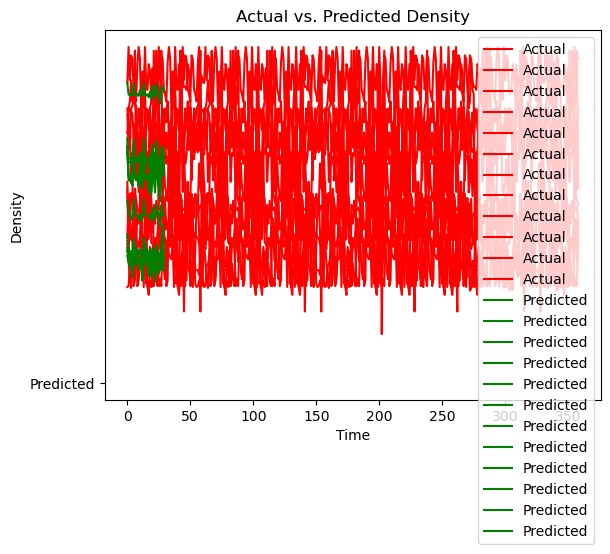

In [50]:
#plot the curves
plt.plot(Y_test, color = 'red', label = 'Actual')
plt.plot(predicted_density, color='green', label= 'Predicted')
plt.plot('Predicted')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.title('Actual vs. Predicted Density')
plt.show()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           45200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 100)           8

In [52]:
#Printing the MSE values for validation of the data
train_mse = hist.history['mean_squared_error']
print(train_mse)

[0.060652293264865875, 0.045571714639663696, 0.04079434275627136, 0.04119694605469704, 0.0381256639957428, 0.034626562148332596, 0.03299481421709061, 0.035283610224723816, 0.030492687597870827, 0.028875606134533882, 0.026553122326731682, 0.030855856835842133, 0.027844669297337532, 0.026691984385252, 0.03133279085159302, 0.0274332445114851, 0.025414515286684036, 0.026164906099438667, 0.02369687892496586, 0.023321891203522682]


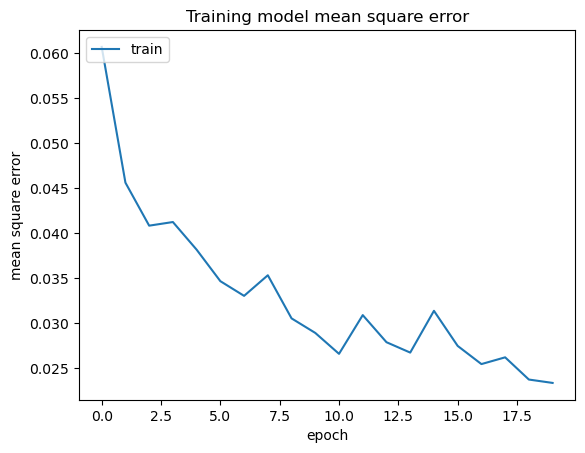

In [53]:
#Mean Square error plot
plt.plot(train_mse)
plt.title('Training model mean square error')
plt.ylabel('mean square error')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

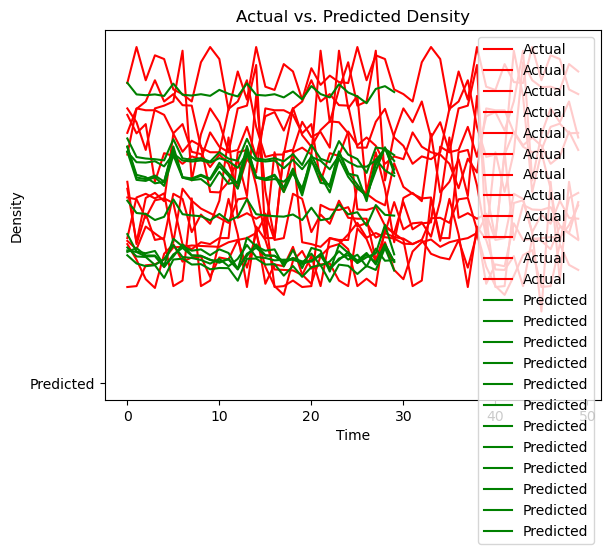

In [62]:
# For having a deeper look in the compact graph above


Y_test_truncated = Y_test[:50]
#plot the curves
plt.plot(Y_test_truncated, color = 'red', label = 'Actual')
plt.plot(predicted_density, color='green', label= 'Predicted')
plt.plot('Predicted')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.title('Actual vs. Predicted Density')
plt.show()